# Loan Application Status Prediction

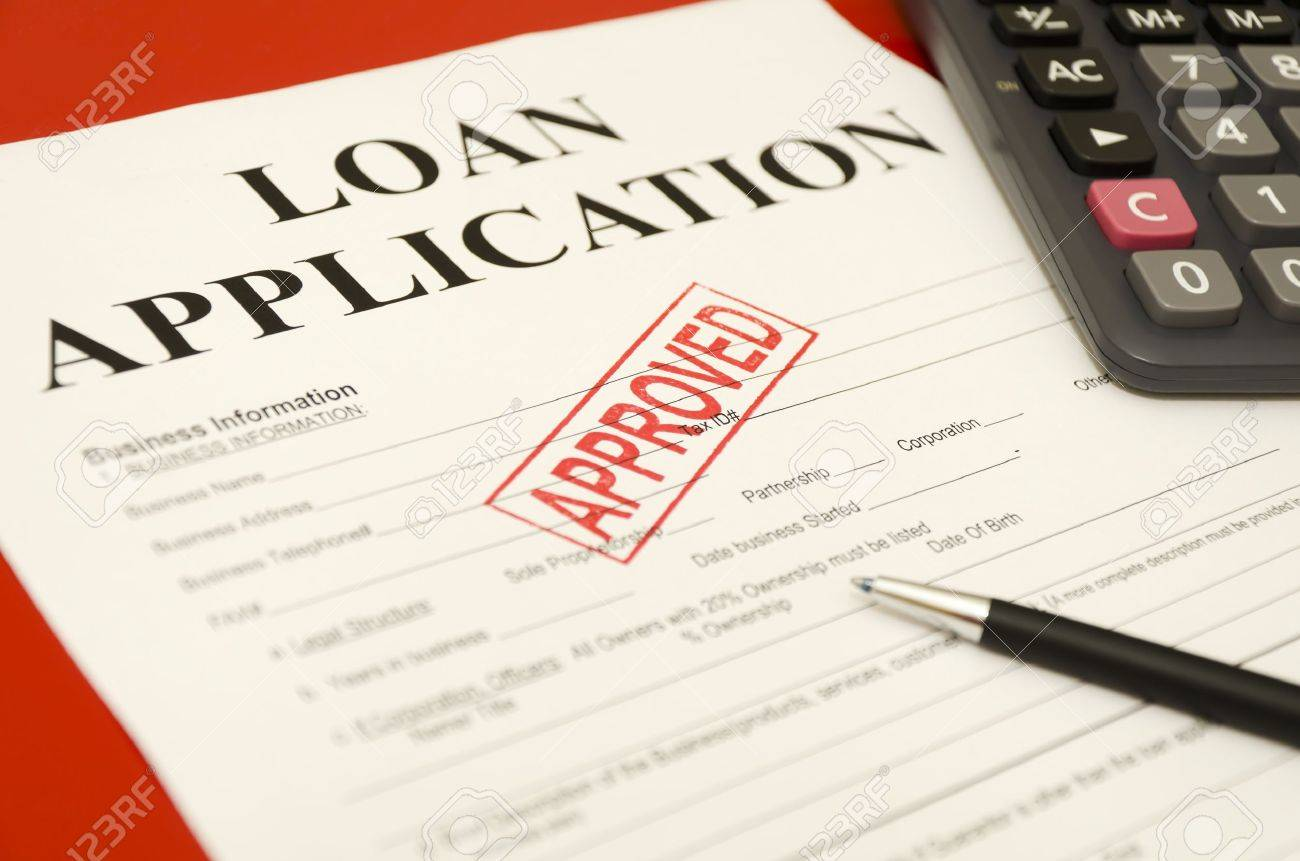

# Project Description

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc


# Independent Variables

==>**Loan_ID** - This refer to the unique identifier of the applicant's affirmed purchases

==>**Gender** - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions

==>**Married** - This refers to applicant being in a state of matrimony

==>**Dependents** - This refres to persons who depends on the applicants for survival

==>**Education** - This refers to number of years in which applicant received systematic instruction, especially at a school or university

==>**Self_Employed** - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer

==>**Applicant Income** - This refers to disposable income available for the applicant's use under State law.

==>**CoapplicantIncome** - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.

==>**Loan_Amount** - This refers to the amount of money an applicant owe at any given time.

==>**Loan_Amount_Term** - This refers to the duaration in which the loan is availed to the applicant

==>**Credit History** - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.

==>**Property_Area** - This refers to the total area within the boundaries of the property as set out in Schedule.

==>**Loan_Status** - This refres to whether applicant is eligible to be availed the Loan requested

**You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset.**

# Dataset Link

https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Loan%20Application%20Status/loan_prediction.csv



In [183]:
#Importing necessory libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [184]:
# Retrive the dataset using the path of the dataset
df=pd.read_csv(r"C:\Users\surie\Downloads\loan_prediction.csv")

In [185]:
df.head(10) #Display the first 10 rows

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


**In the given dataset link, there were no headers initially. However, I corrected this by using the product description as an independent variable using excel, ensuring proper headers for my Dataframe**

In [186]:
df.tail(10) #Display the last 10 rows

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N
606,LP002961,Male,Yes,1,Graduate,No,3400,2500.0,173.0,360.0,1.0,Semiurban,Y
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


**==>The dataset provides information related to applicants who have applied for loan**

# 1.Exploratory Data Analysis (EDA)

### 1.1 Dimension of the Dataset

In [187]:
df.shape #checking the dimension of the dataset

(614, 13)

Data set contains **614 rows and 13 Columns**(from this 1 column is target variable ,then other 12 are independent variables)

### 1.2 Columns of the Dataset

In [188]:
print(f"Columns Names:{df.columns}") #columns of the dataset

Columns Names:Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


Here **Loan_Status is our Target Variable**

### 1.3 Datatype of the Columns

In [189]:
# checking the datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


This dataset contains

==>**8 object(string)** value columns

==>**4 float64** value columns

==>**1 int64(integers)** value columns

The dataset **presents null values** in some columns.

### 1.4 Missing values

In [190]:
# checking the null values
missing_val = df.isnull().sum().to_frame("Null values")

# Calculate the % of the null values
missing_val["% of missing"] = round(missing_val['Null values'] / len(df) * 100,2)

missing_val

,Null values,% of missing
Loan_ID,0,0.00
Gender,13,2.12
Married,3,0.49
Dependents,15,2.44
Education,0,0.00
Self_Employed,32,5.21
ApplicantIncome,0,0.00
CoapplicantIncome,0,0.00
LoanAmount,22,3.58
Loan_Amount_Term,14,2.28


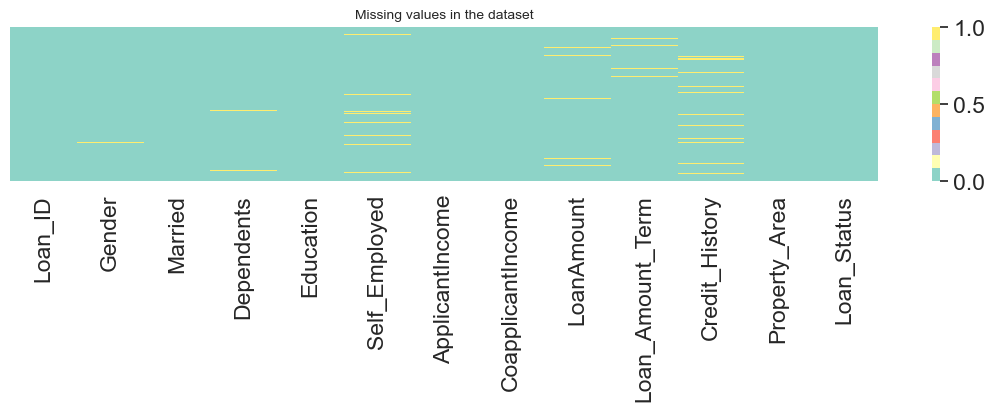

In [191]:
# Let's visualize it using heatmap for dataset
plt.figure(figsize=(14,2))
sns.heatmap(df.isnull(), yticklabels=False, cmap='Set3')
plt.title('Missing values in the dataset', fontsize=10);

The columns Gender, Married, Dependents, Self_Employed, LoanAmount, Loan-Amount_Term, Credit_History present null values. The missing values will be treated in further sections.

# 1.5 Features Analysis

### 1.5.1 Unique Values

Next, we’ll explore the distinct values present in each column of the dataset to **gain insights into the data and its features.**

In [192]:
# Reviewing the number of unique values in each feature and the target
info_df = df.nunique().to_frame('No. of Unique values')
info_df['type'] = df.dtypes.values

info_df

,No. of Unique values,type
Loan_ID,614,object
Gender,2,object
Married,2,object
Dependents,4,object
Education,2,object
Self_Employed,2,object
ApplicantIncome,505,int64
CoapplicantIncome,287,float64
LoanAmount,203,float64
Loan_Amount_Term,10,float64


In [193]:
# Checking for columns with one unique value or have the same unique values as rows has the dataset
info_df[(info_df['No. of Unique values'] == 1) | (info_df['No. of Unique values'] == df.shape[0]) ]

,No. of Unique values,type
Loan_ID,614,object


From above analysis:

  ==>**Loan_ID column has the same unique values as the dataset rows**, this column only serves to identify each record but doesn't influence the target variable. Therefore we can drop it.

  ==>The dataset contains the following **categorical variables**: Gender(2), Married(2), Dependents(4), Education(2), Self_Employed(2), Property_Area(3), Loan_Status(2) with its respective unique values.

  ==>The **numerical and continuous columns** in the dataset are: ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History

 ==>However, the Credit_History(2) and Loan_Amount_Term(10) columns, **despite being numerical, should be analyzed as categorical during EDA.**

Next, we will remove the column Loan_ID for the reasons explained previously.

In [194]:
 #Dropping the column Loan_ID
df.drop(['Loan_ID'], axis=1, inplace=True)
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [195]:
# checking the new dimension of the dataset
print(f"The rows and columns in the dataset: {df.shape}")

The rows and columns in the dataset: (614, 12)


Now the dataset contains 614 rows and 12 columns. The target variable and 11 independent variables.

### 1.5.1.1 Loan Status unique values

In [196]:
# Checking the target variable
df['Loan_Status'].value_counts().to_frame()

,count
Loan_Status,
Y,422
N,192


### Custom function for showing percentange in the graph

In [197]:
def show_percentage(ax, total):
    ''' Shows the representative percentage in each bar in a countplot.'''
    for p in ax.patches:
        percentage = f"{100 * p.get_height()/total:.1f} %"
        x = p.get_x() + p.get_width() / 2 - 0.02
        y = p.get_height()
        ax.annotate(percentage, (x, y), fontsize=10, ha='center')

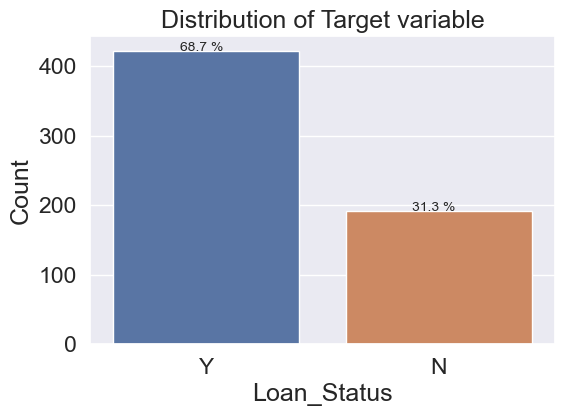

In [198]:
# Visualize the distribution of Loan_Status
col = 'Loan_Status'
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x=col)
show_percentage(ax, len(df))
plt.title('Distribution of Target variable')
plt.xlabel(col)
plt.ylabel('Count')
plt.show()

we can observe the **dataset is imbalanced**. There are significantly more records(68.7%) for "Y" compared to 31.3% for "N". We will rectify it by using the oversampling method in the later part.

### 1.5.1.2 Categorical variables unique values

In [199]:
# Separating Numerical and Categorical columns
categorical_col = []
numerical_col = []

for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categorical_col.append(i)
    else:
        numerical_col.append(i)

#  Numerical and Categorical columns
print(f"Categorical Columns:\n {categorical_col}\n")
print(f"Numerical Columns:\n {numerical_col}\n")

Categorical Columns:
 ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

Numerical Columns:
 ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']



In [200]:
num_cat_col = ['Loan_Amount_Term', 'Credit_History']
print(f"Numerical Columns that represent a category:\n {num_cat_col}\n")

Numerical Columns that represent a category:
 ['Loan_Amount_Term', 'Credit_History']



In [201]:
# Checking the value counts of the categorical independent variables
for i, col in enumerate(categorical_col):
    print(f"{i+1}.{col}:\n{df[col].value_counts()}\n")

1.Gender:
Gender
Male      489
Female    112
Name: count, dtype: int64

2.Married:
Married
Yes    398
No     213
Name: count, dtype: int64

3.Dependents:
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

4.Education:
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

5.Self_Employed:
Self_Employed
No     500
Yes     82
Name: count, dtype: int64

6.Property_Area:
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

7.Loan_Status:
Loan_Status
Y    422
N    192
Name: count, dtype: int64



These are the unique values for the categorical independent variables.

In [202]:
# Checking the value counts of the Numerical Columns that represent a category:
for i, col in enumerate(num_cat_col):
    print(f"{i+1}.{col}:\n{df[col].value_counts(dropna=False)}\n")

1.Loan_Amount_Term:
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

2.Credit_History:
Credit_History
1.0    475
0.0     89
NaN     50
Name: count, dtype: int64



These are the unique values for Numerical columns that represent a category

### 1.5.1.3 Numerical variables unique values

In [203]:
# Select the rest of the numerical columns
num_col = [col for col in numerical_col if col not in num_cat_col]
num_col

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [204]:
# Checking the value counts of the numerical independent variables
for i, col in enumerate(num_col):
    print(f"{i+1}.{col}:\n{df[col].value_counts()}\n")

1.ApplicantIncome:
ApplicantIncome
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: count, Length: 505, dtype: int64

2.CoapplicantIncome:
CoapplicantIncome
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: count, Length: 287, dtype: int64

3.LoanAmount:
LoanAmount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64



These are the unique values for the numerical independent variables

### 1.5.2 Summary statistics of the numerical variables and non-numerical variables

In [205]:
# Summary statistics of numerical columns
stats = df.describe()

stats

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


==>There is **no negative value present**

==>There is **missing values presents in the columns**

==>The mean value is greater than the median(50%)**ApplicantIncome, CoapplicantIncome, and LoanAmount** columns which means **the data is skewed to right**.


==>By summarizing the data we can observe there is a huge difference between 75% and max in many columns, hence there are **outliers presented in the columns.**

==>we can also notice the **standard deviation,min,25% percentile value** from this describe method

In [206]:
# Look at the non numeric columns
df.describe(exclude=[np.number])

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


Here we can see the number of unique values for each categorical variable as well as the most frequent value.

### 1.5.3 Duplicates

In [207]:
# Searching for duplicated values
df[df.duplicated()].shape

(0, 12)

The dataset does not have duplicate values.

# 1.6 Data Visualization

### 1.6.1 Univariate Analysis

### 1.6.1.1 Target feature

In [208]:
# Distribution of Loan Status
df['Loan_Status'].value_counts().to_frame()

,count
Loan_Status,
Y,422
N,192


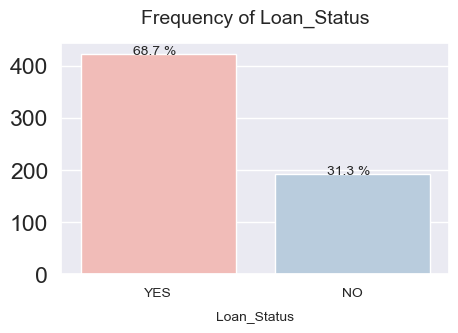

In [209]:
# Set the custom palette
sns.set_palette('Pastel1')

# Visualize the frequency of Loan_Status
col = 'Loan_Status'
plt.figure(figsize=(5, 3))
ax = sns.countplot(x=col, data=df)
show_percentage(ax, len(df)) 

plt.xlabel(col, size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.xticks((0, 1), ['YES', 'NO'], size=10)
plt.title(f"Frequency of {col}", size=14, y=1.05);

**422 (68.7%) records as "Y" and only 192 (31.3%) records as "N" of the total dataset. The target variable is imbalanced.**

### 1.6.1.2 Categorical columns

In [210]:
# List of categorical columns in the dataset
for i,col in enumerate(categorical_col[:-1]):
    print(f"{i+1}.{col}")

1.Gender
2.Married
3.Dependents
4.Education
5.Self_Employed
6.Property_Area


,count
Gender,
Male,489
Female,112


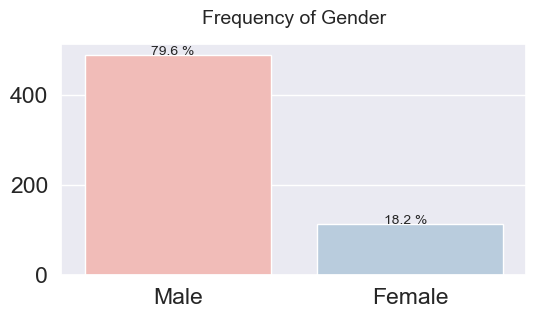

In [211]:
# Visualize the frequency of Gender(1)
col = 'Gender'
plt.figure(figsize=(6, 3))
ax = sns.countplot(x=col, data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05)

df[col].value_counts().to_frame()

**79.6% are Male and the rest 18.2% are Female.**

,count
Married,
Yes,398
No,213


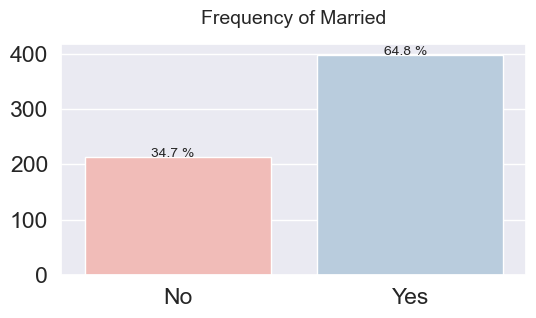

In [212]:
# Visualize the frequency of Married(2)
col = 'Married'
plt.figure(figsize=(6, 3))
ax = sns.countplot(x=col, data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05)

df[col].value_counts().to_frame()

**64.8% of the dataset are Married, and 34.7% are No Married.**

,count
Dependents,
0,345
1,102
2,101
3+,51


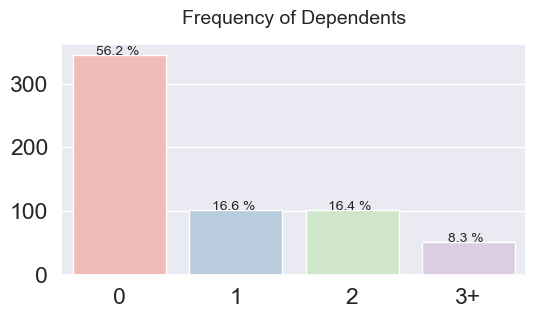

In [213]:
# Visualize the frequency of Dependents(3)
col = 'Dependents'
plt.figure(figsize=(6, 3))
ax = sns.countplot(x=col, data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05)

df[col].value_counts().to_frame()

**56.2% have 0 dependents, 16.6% have 1, 16.4% have 2, and 8.3% have more than 3.**

,count
Education,
Graduate,480
Not Graduate,134


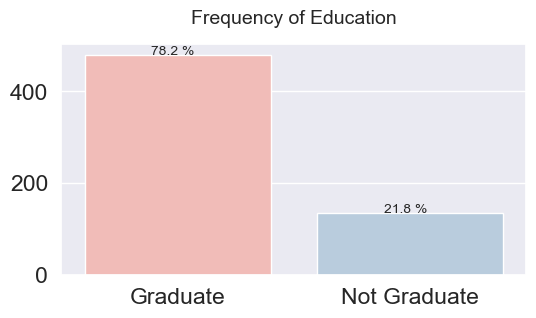

In [214]:
# Visualize the frequency of Education(4)
col = 'Education'
plt.figure(figsize=(6, 3))
ax = sns.countplot(x=col, data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05)

df[col].value_counts().to_frame()

**78.2% correspond to Graduate level of education, and 21.8% to non-graduate level.**

,count
Self_Employed,
No,500
Yes,82


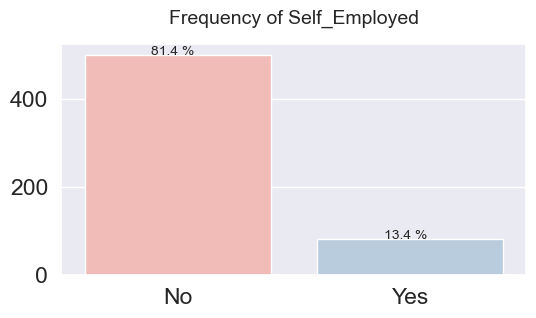

In [215]:
# Visualize the frequency of Self_Employed(5)
col = 'Self_Employed'
plt.figure(figsize=(6, 3))
ax = sns.countplot(x=col, data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05)

df[col].value_counts().to_frame()

**81.4% are not self employed, and the rest 13.4% are self employed.**

,No.,%
Property_Area,,
Semiurban,233,37.95
Urban,202,32.90
Rural,179,29.15


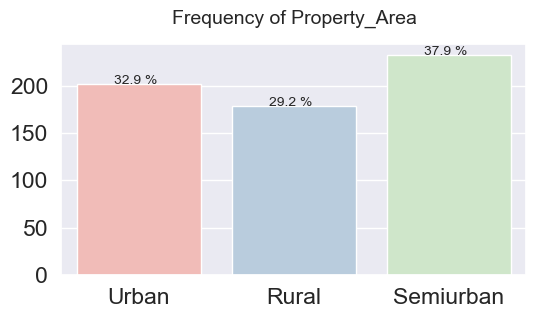

In [216]:
# Visualize the frequency of Property_Area(6)
col = 'Property_Area'
plt.figure(figsize=(6, 3))
ax = sns.countplot(x=col, data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05)

values_column = df[col].value_counts().to_frame('No.')
values_column['%'] = round(df[col].value_counts(normalize=True) * 100, 2)
values_column

**37.9% of the group live in Semi Urban area, followed by 32.9% who live in Urban area, and the rest 29.2% in Rural area.**

### 1.6.1.3 Numerical columns analyzed as categories

In [217]:
# List of numerical columns that look like categories
for i,col in enumerate(num_cat_col):
    print(f"{i+1}. {col}")

1. Loan_Amount_Term
2. Credit_History


,No.,%
Loan_Amount_Term,,
360.0,512,83.39
180.0,44,7.17
480.0,15,2.44
NaN,14,2.28
300.0,13,2.12
240.0,4,0.65
84.0,4,0.65
120.0,3,0.49
60.0,2,0.33


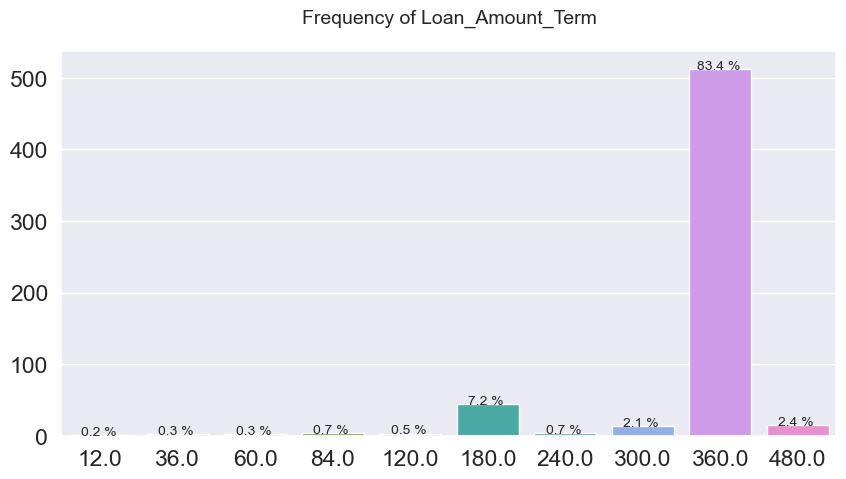

In [218]:
# Visualize the frequency of Loan_Amount_Term(1)
col = 'Loan_Amount_Term'
plt.figure(figsize=(10, 5))
ax = sns.countplot(x=col, data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05)

values_column = df[col].value_counts( dropna=False).to_frame('No.')
values_column['%'] = round(df[col].value_counts(normalize=True, dropna=False) * 100, 2)
values_column

**The majority of the group has 360 as loan amount term (83.4%), followed by 7.2% with 180 as loan amount term. The others terms have a minimal representation**

,No.,%
Credit_History,,
1.0,475,77.36
0.0,89,14.50
NaN,50,8.14


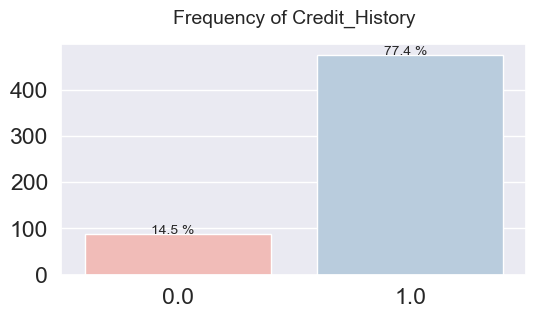

In [219]:
# Visualize the frequency of Credit_History(2)
col = 'Credit_History'
plt.figure(figsize=(6, 3))
ax = sns.countplot(x=col, data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05)

values_column = df[col].value_counts(dropna=False).to_frame('No.')
values_column['%'] = round(df[col].value_counts(normalize=True, dropna=False) * 100, 2)
values_column

77.4% of the group have credit history but there is 14.5% that have not.

### 1.6.1.4 Numerical columns

In [220]:
# Select the rest of the numerical columns
num_col = [col for col in numerical_col if col not in num_cat_col]
num_col

# List of numerical columns
for i,col in enumerate(num_col):
    print(f"{i+1}. {col}")

1. ApplicantIncome
2. CoapplicantIncome
3. LoanAmount


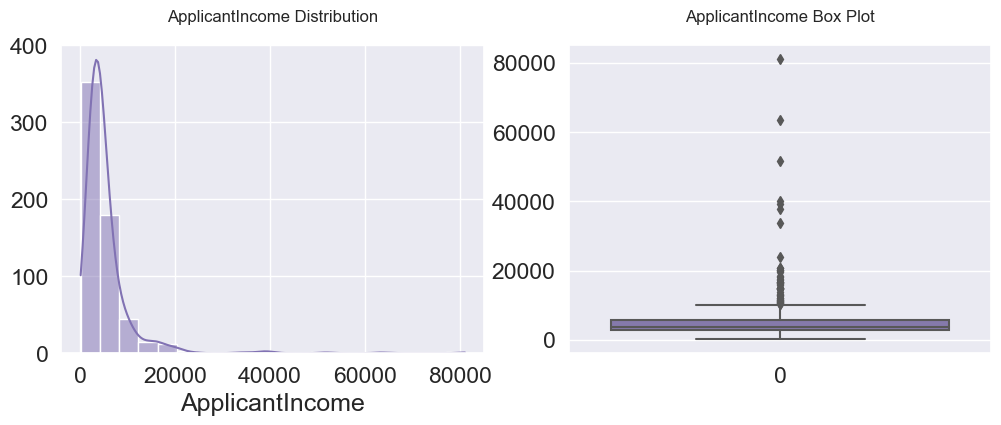

Skewness of ApplicantIncome : 6.539513113994625


In [221]:
#Visualize (1) ApplicantIncome distribution
col = 'ApplicantIncome'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='m')
sns.boxplot(df[col], ax=axes[1], color='m')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Age
print(f"Skewness of {col} : {df[col].skew()}")

**The distribution of ApplicantIncome is skewed to the right. There are outliers present in the Box plot.**

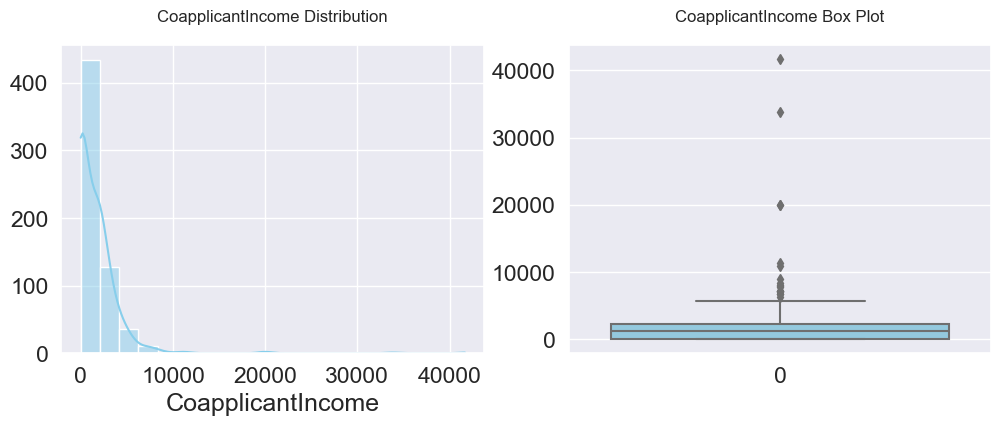

Skewness of CoapplicantIncome : 7.491531216657306


In [222]:
#Visualize (2) CoapplicantIncome distribution
col = 'CoapplicantIncome'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='skyblue')
sns.boxplot(df[col], ax=axes[1], color='skyblue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

**The distribution of CoapplicantIncome is skewed to the right. There are outliers present in the Box plot.**

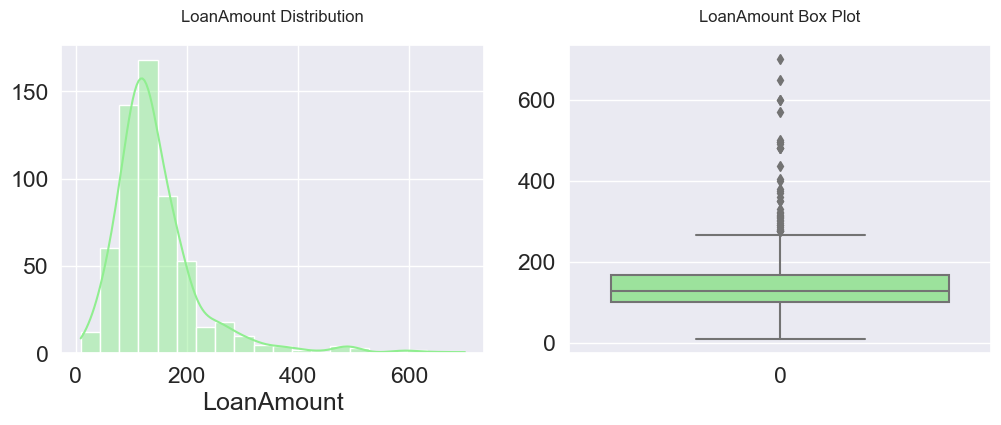

Skewness of LoanAmount : 2.677551679256059


In [223]:
#Visualize (3) LoanAmount distribution
col = 'LoanAmount'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='lightgreen')
sns.boxplot(df[col], ax=axes[1], color='lightgreen')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of DailyRate
print(f"Skewness of {col} : {df[col].skew()}")

**The distribution of LoanAmount is skewed to the right. There are outliers present in the Box plot.**

# 1.6.2 Bivariate Analysis

### 1.6.2.1 BoxPlot Analysis: Finding outliers and comparing for Loan Status

In [224]:
# List of numerical columns
for i,col in enumerate(num_col):
    print(f"{i+1}. {col}")

1. ApplicantIncome
2. CoapplicantIncome
3. LoanAmount


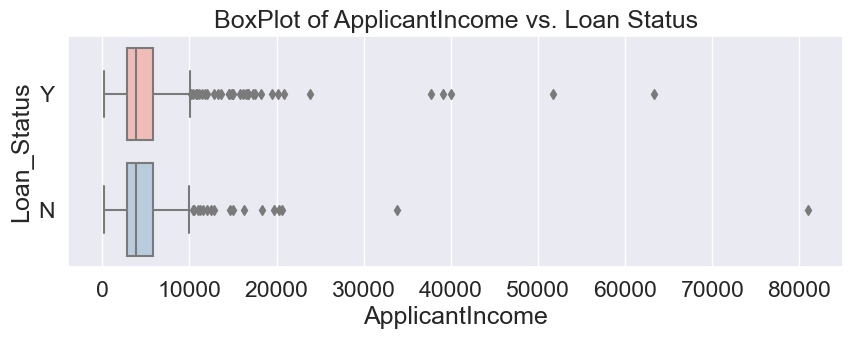

In [225]:
# Visualizing and comparing each independent variable with target
# Columns 1. ApplicantIncome 
col = 'ApplicantIncome'
plt.figure(figsize=(10, 3))
sns.boxplot(data=df[[col,'Loan_Status']], x=col, y='Loan_Status')
plt.title(f"BoxPlot of {col} vs. Loan Status")
    
plt.show()

**There are outliers for Y and  N.**

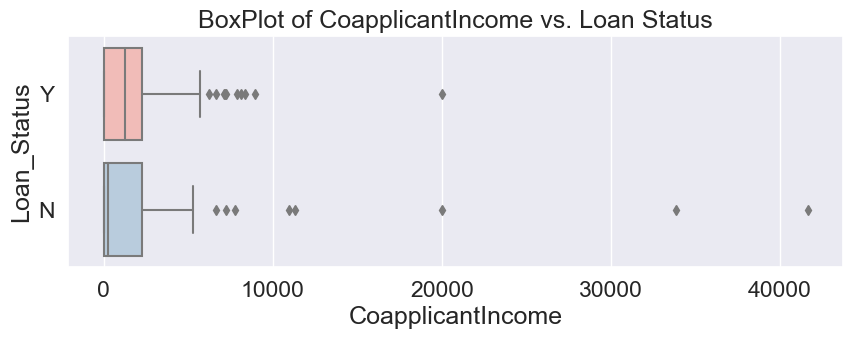

In [226]:
# Visualizing and comparing each independent variable with target
# Columns 2. CoapplicantIncome 
col = 'CoapplicantIncome'
plt.figure(figsize=(10, 3))
sns.boxplot(data=df[[col,'Loan_Status']], x=col, y='Loan_Status')
plt.title(f"BoxPlot of {col} vs. Loan Status")
    
plt.show()

**==>here are outliers for Y and N, in Coapplicant Income column.**

**==>The mean of Y is higher than the mean of N.**

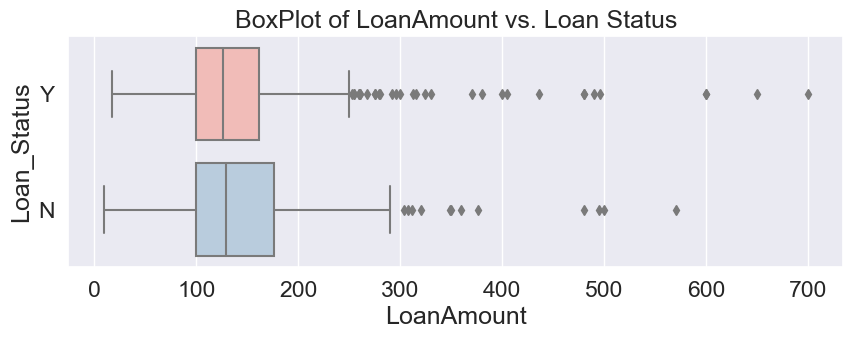

In [227]:
# Visualizing and comparing each independent variable with target
# Columns 3. LoanAmount 
col = 'LoanAmount'
plt.figure(figsize=(10, 3))
sns.boxplot(data=df[[col,'Loan_Status']], x=col, y='Loan_Status')
plt.title(f"BoxPlot of {col} vs. Loan Status")
    
plt.show()

**==>Seems like Loan Amount has similar metrics for Y/N Loan Status, with a slight inclination for N when Loan Amount is higher.**

**==>There are outliers in Loan Amount in Y and N.**

### 1.6.2.2 Relation between target variable and categorical columns

In [228]:
# List of categorical columns in the dataset
for i,col in enumerate(categorical_col[:-1]):
    print(f"{i+1}.{col}")

1.Gender
2.Married
3.Dependents
4.Education
5.Self_Employed
6.Property_Area


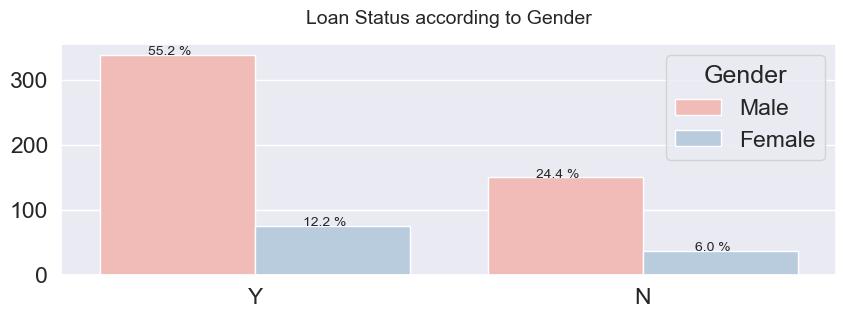

In [229]:
# Compare Gender vs Loan Status
col = 'Gender'
plt.figure(figsize=(10, 3))
ax = sns.countplot(x='Loan_Status', hue=col, data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Loan Status according to {col}", size=14, y=1.05);

**The majority of those who were granted the loan are men with a percentage of 55.2% versus 12.2% of women.**

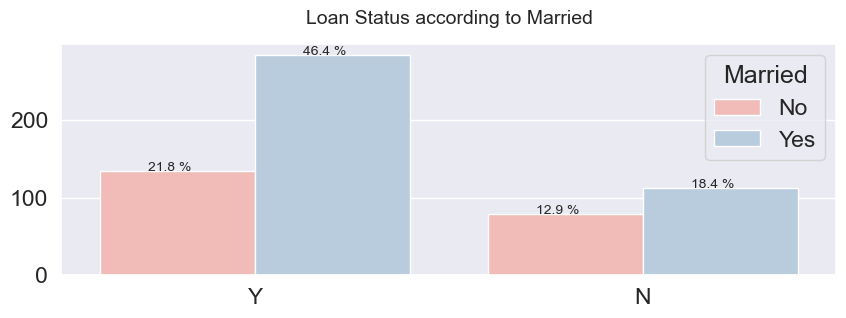

In [230]:
# Compare Married vs Loan Status
col = 'Married'
plt.figure(figsize=(10, 3))
ax = sns.countplot(x='Loan_Status', hue=col, data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Loan Status according to {col}", size=14, y=1.05);

**The majority of those who were granted the loan are married (46.4%) and 21.8% were not married.**

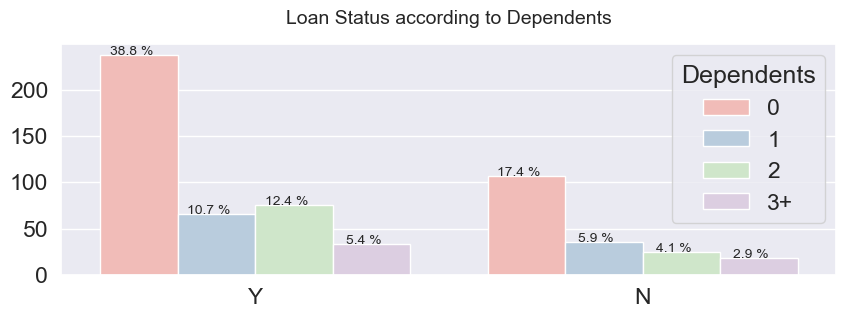

In [231]:
# Compare Dependents vs Loan Status
col = 'Dependents'
plt.figure(figsize=(10, 3))
ax = sns.countplot(x='Loan_Status', hue=col, data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Loan Status according to {col}", size=14, y=1.05);

**The majority of those who were granted the loan have 0 dependents 38.8%**

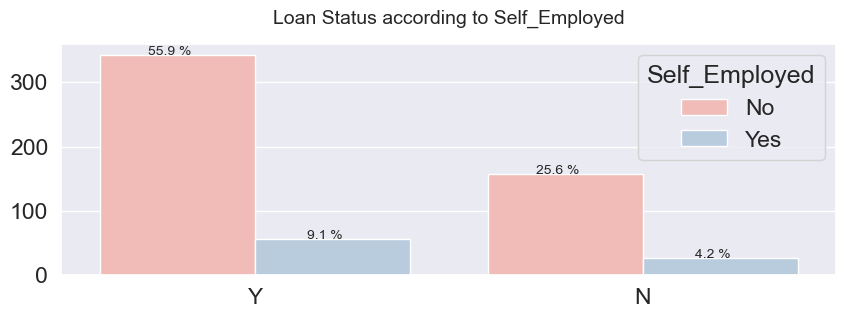

In [232]:
# Compare Self_Employed vs Loan Status
col = 'Self_Employed'
plt.figure(figsize=(10, 3))
ax = sns.countplot(x='Loan_Status', hue=col, data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Loan Status according to {col}", size=14, y=1.05);

**According to the above plot, there is more likely that someone who is not self-employed receives the loan (55.9%), in contrast with the 9.1% for self-employed who received the loan.**

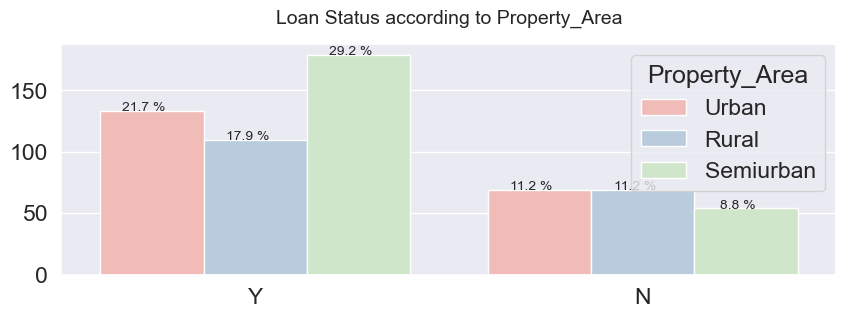

In [233]:
# Compare Property_Area vs Loan Status
col = 'Property_Area'
plt.figure(figsize=(10, 3))
ax = sns.countplot(x='Loan_Status', hue=col, data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Loan Status according to {col}", size=14, y=1.05);

**There is a notable inclination that who live in semi-urban areas to received a loan with 29.2%, followed by urban areas with 21.7%, and in rural areas only 17.9%.**

### 1.6.2.3 Relation between target variable and Numerical columns analyzed as categories

In [234]:
# List of numerical columns that look like categories
for i,col in enumerate(num_cat_col):
    print(f"{i+1}. {col}")

1. Loan_Amount_Term
2. Credit_History


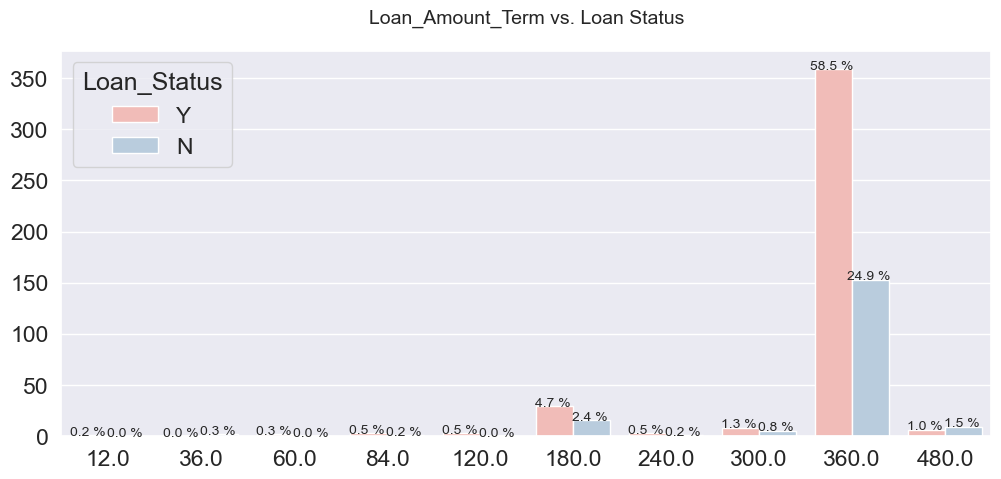

In [235]:
# Compare Loan_Amount_Term vs Loan Status
col = 'Loan_Amount_Term'
plt.figure(figsize=(12, 5))
ax = sns.countplot(x=col, hue='Loan_Status', data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)

plt.title(f"{col} vs. Loan Status", size=14, y=1.05);

**The majority of those who received a loan are assigned a loan amount term of 360.**

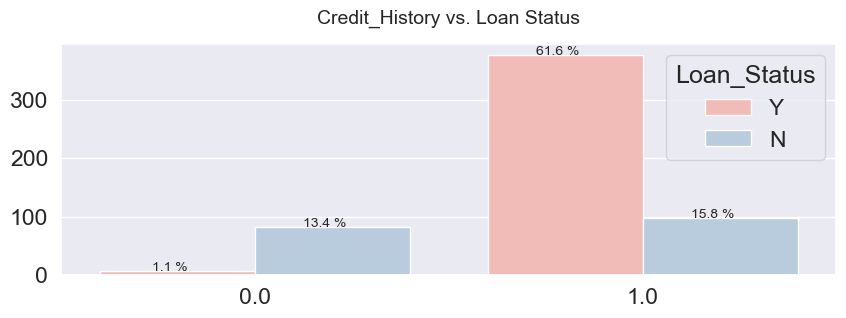

In [236]:
# Compare Credit_History vs Loan Status
col = 'Credit_History'
plt.figure(figsize=(10, 3))
ax = sns.countplot(x=col, hue='Loan_Status', data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)

plt.title(f"{col} vs. Loan Status", size=14, y=1.05);

**61.6% correspond to people who obtain the loan who have a credit history. There are 15.8% who do not obtain the loan despite having a credit history. Only 1.1% of those who have no credit history obtain the loan.**

### 1.6.2.4 Relation between Applicant Income and the Loan Amount

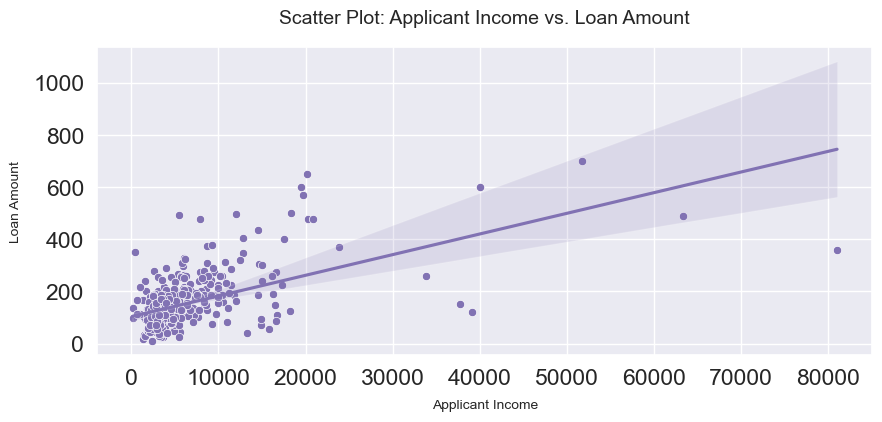

In [237]:
plt.figure(figsize=(10, 4))
ax = sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=df,color='m')
sns.regplot(x='ApplicantIncome', y='LoanAmount', data=df, scatter=False, ax=ax, color='m')

plt.xlabel('Applicant Income', size=10, labelpad=8)
plt.ylabel('Loan Amount', size=10, labelpad=8)
plt.title('Scatter Plot: Applicant Income vs. Loan Amount', size=14, y=1.05);

**Seems to be a linear relation between the applicant income and the loan amount.**

### 1.6.2.5 Relation between Coapplicant Income and the Loan Amount

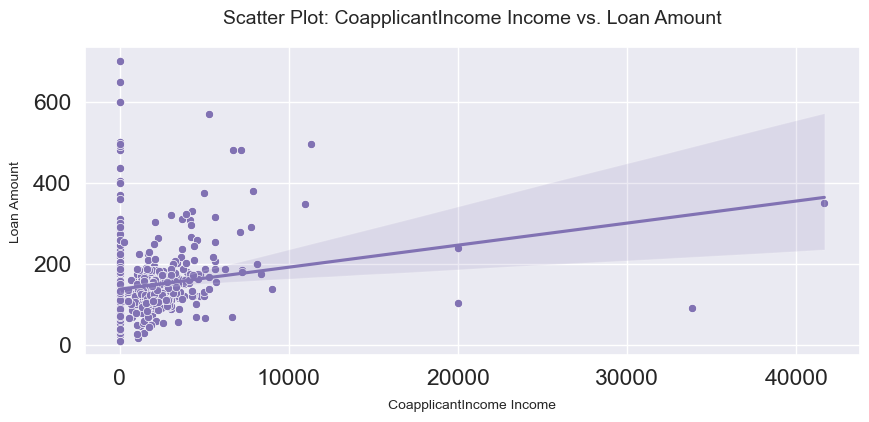

In [238]:
plt.figure(figsize=(10, 4))
ax = sns.scatterplot(x='CoapplicantIncome', y='LoanAmount', data=df,color='m')
sns.regplot(x='CoapplicantIncome', y='LoanAmount', data=df, scatter=False, ax=ax, color='m')

plt.xlabel('CoapplicantIncome Income', size=10, labelpad=8)
plt.ylabel('Loan Amount', size=10, labelpad=8)
plt.title('Scatter Plot: CoapplicantIncome Income vs. Loan Amount', size=14, y=1.05);

**Seems to be a linear relation between the co-applicant income and the loan amount.**

# 1.6.3 Multivariate Analysis

## 1.6.3.1 Pairplot

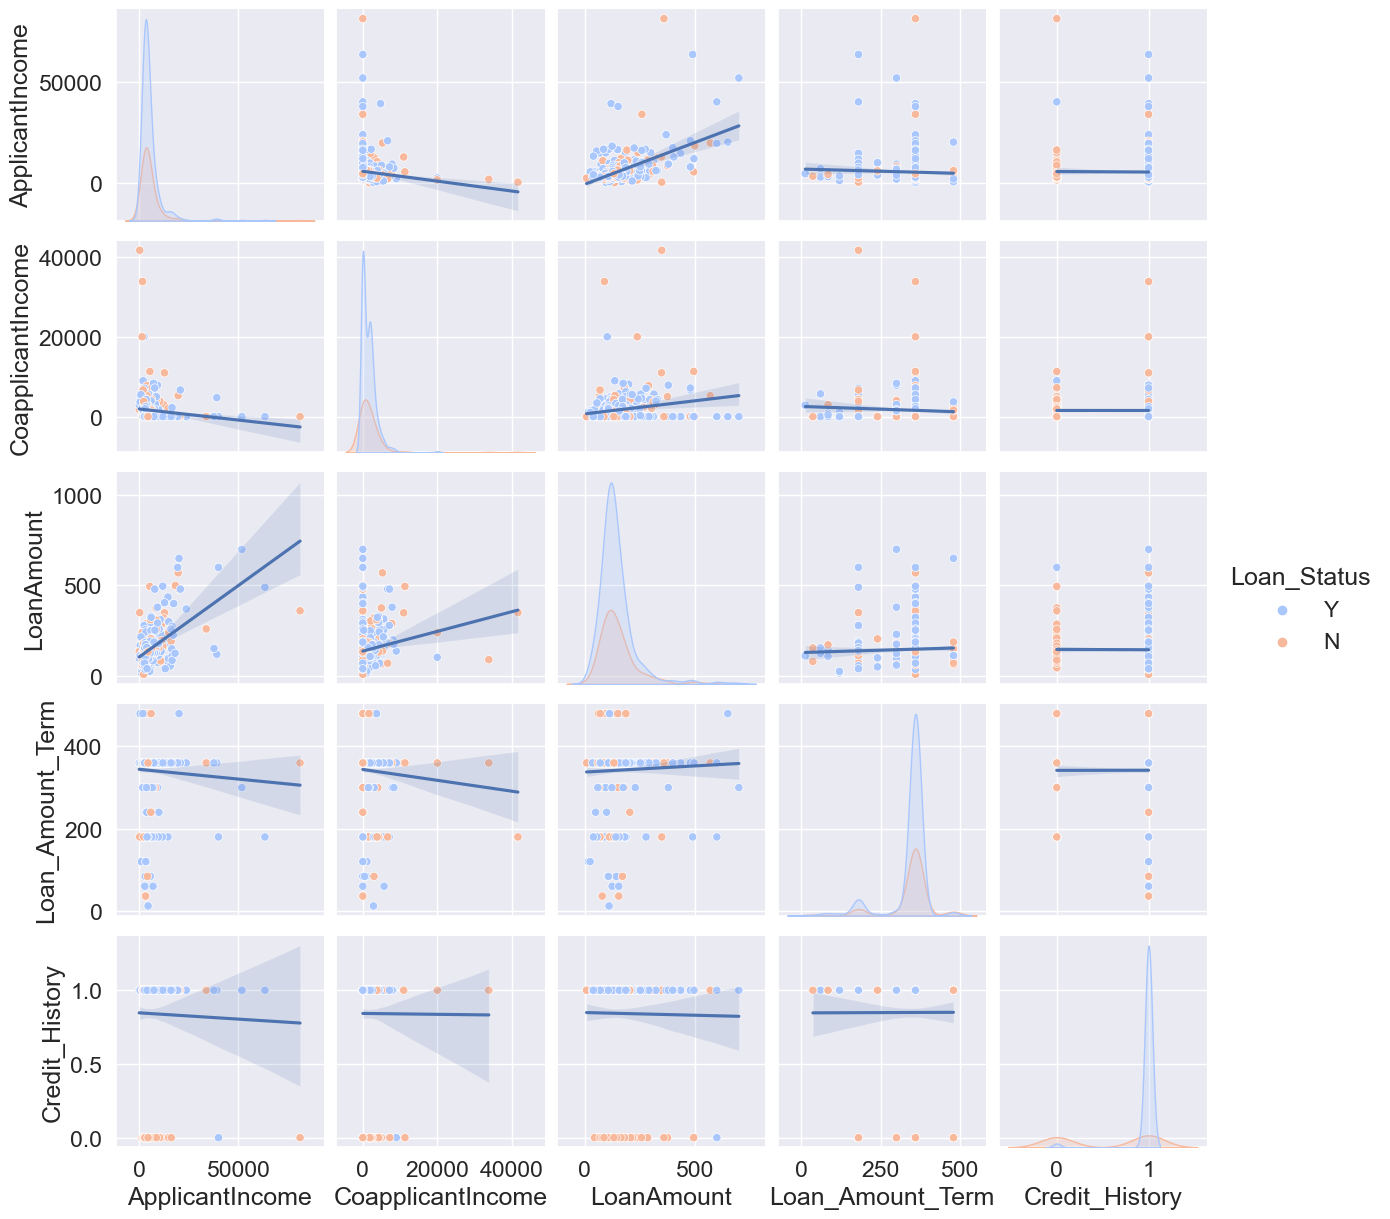

In [239]:
sns.set(font_scale=1.5)  
grid = sns.pairplot(df, hue='Loan_Status', palette = "coolwarm")

# Add a regression line for non-diagonal plots
for ax in grid.axes.flat[1:-1]: # first and last axes are not considered
    if ax.get_xlabel() != ax.get_ylabel():
        sns.regplot(data=df, x=ax.get_xlabel(), y=ax.get_ylabel(), scatter=False, ax=ax, color='b')

plt.show()

**There is a positive correlation between ApplicationIncome, CoapplicationIncome, and LoanAmount.**

# 1.6.3.2 Encoding the target variable

In [240]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [241]:
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


Now the label is encoded having values 1 for Y and 0 for N.

### 1.6.3.2 Correlation between target variable and independent variables.

In [242]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for numerical columns
cor = numerical_df.corr()

# Display the correlation matrix
cor

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


In [243]:
# Listing the correlation coeficients with the target variable 
corr_df = cor.unstack().sort_values(ascending=False).reset_index()
corr_df.columns = ['Feature A', 'Feature B', 'Corr coef']
corr_df[(corr_df['Feature A'] == 'Loan_Status') ]

,Feature A,Feature B,Corr coef
5,Loan_Status,Loan_Status,1.000000
9,Loan_Status,Credit_History,0.561678
18,Loan_Status,ApplicantIncome,-0.004710
24,Loan_Status,Loan_Amount_Term,-0.021268
27,Loan_Status,LoanAmount,-0.037318
30,Loan_Status,CoapplicantIncome,-0.059187


The label has a medium positive correlation with Credit_History.

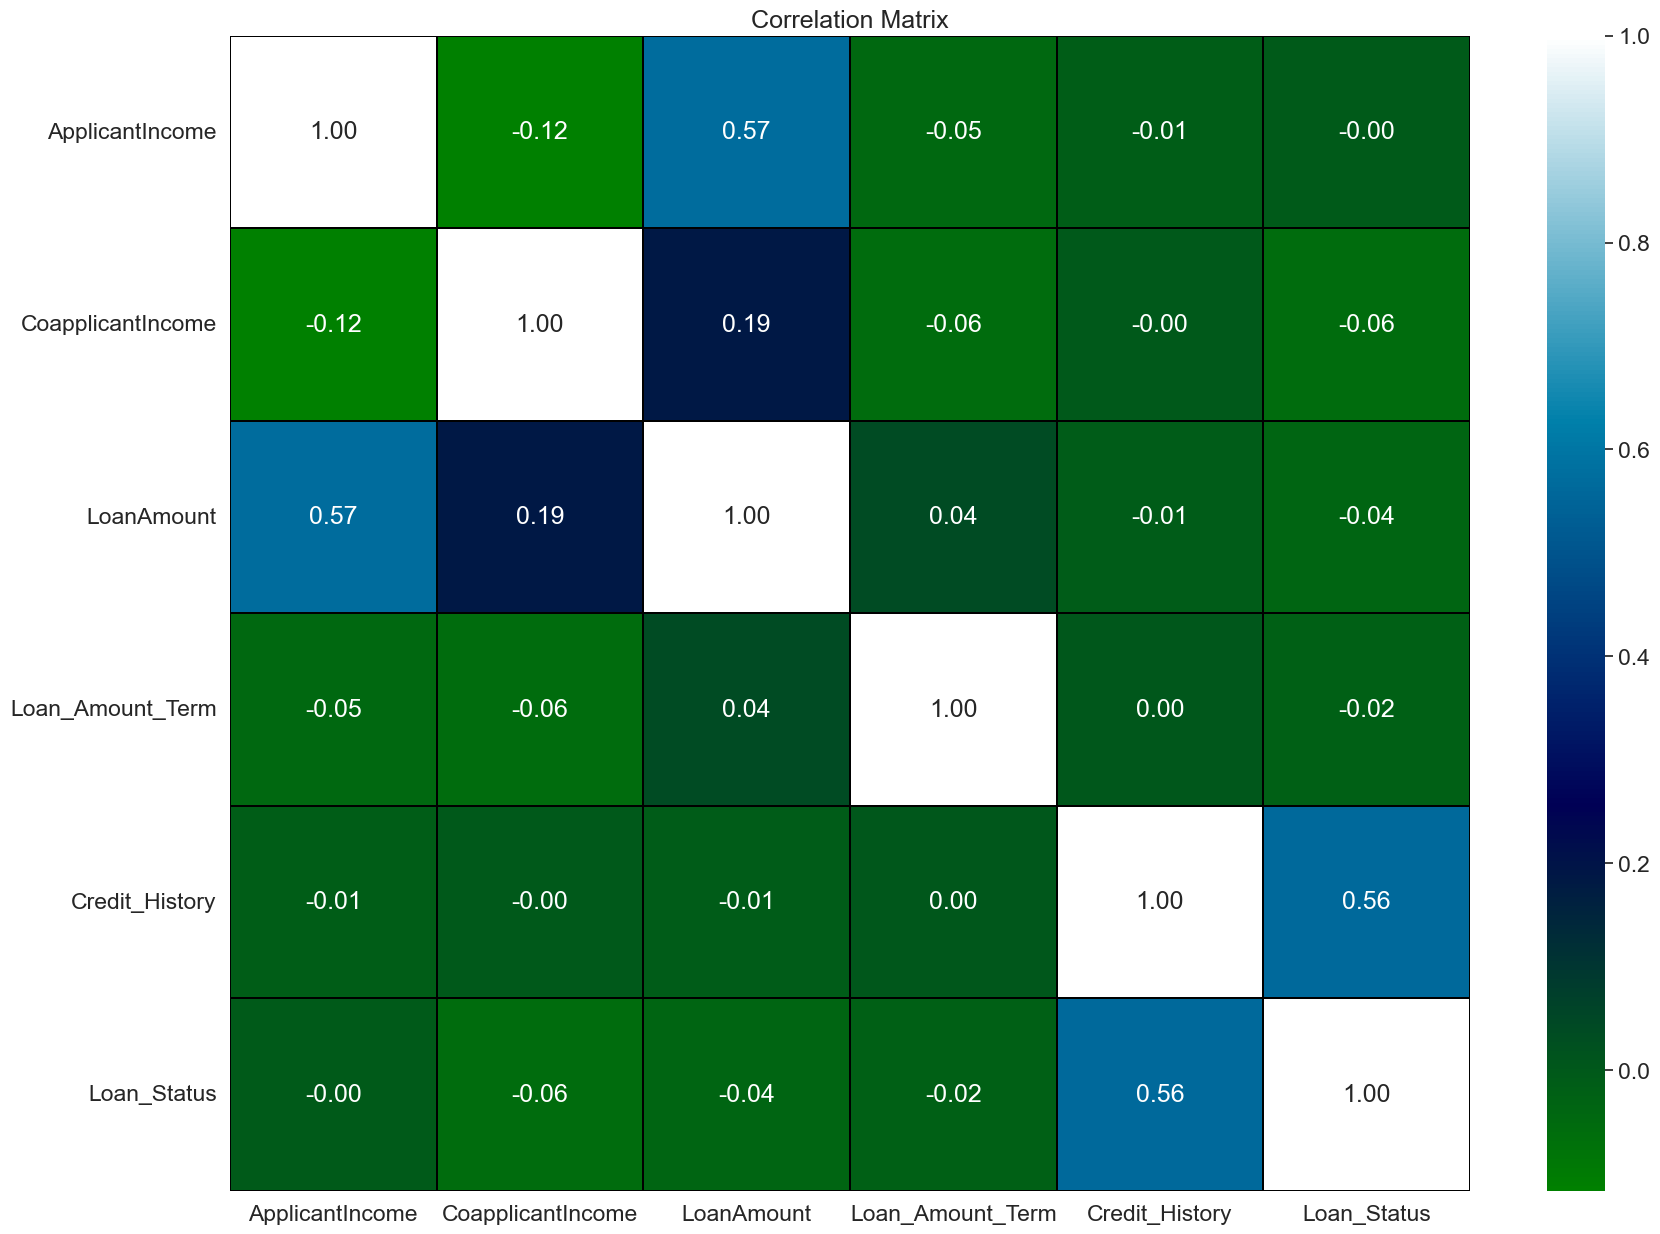

In [244]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(cor, linewidths = 0.1, fmt = ".2f", linecolor = 'black', cmap='ocean', annot=True)
plt.yticks(rotation = 0)
plt.title('Correlation Matrix')
plt.show()

**=>0-no relation**

**==>-0.3 to 0.3 less relation**

**==>greater than -0.5 or 0.5 greater than(moderate correlation)**

**==>greater than -0.7 or 0.7 greater than(high correlation)**

**1) From above heatmap we can see,there are positive correlation and negative correlation between label and feature columns.**

**2)The target is high correlated with Credit_History(+0.56)**

**3)The LoanAmount is correlated with ApplicationIncome(+0.57), and CoapplicantIncome(+0.19)**

# 2. Preprocessing Data

### 2.1 Missing values

In Section 1.4 we found out that the dataset has missing values. In this section we will manage this issue.

In [245]:
missing_val = missing_val[missing_val['% of missing'] > 0]
missing_val

,Null values,% of missing
Gender,13,2.12
Married,3,0.49
Dependents,15,2.44
Self_Employed,32,5.21
LoanAmount,22,3.58
Loan_Amount_Term,14,2.28
Credit_History,50,8.14


In the above columns we have missing values. For the columns with less than 2.4% of missing values we will drop them. For the other columns we will impute the missing values according with the nature feature.

### 2.1.1 Dropping missing values less than 2.4% of missing

Statistically speaking, if the number of missing observations is less than 5% of the sample, we can drop them. However, we are going to set the threshold as 2.4% in order to lose less than 5% of data.

In [246]:
cols_with_less_2_4 = missing_val[missing_val['% of missing'] < 2.4].index.to_list()
cols_with_less_2_4

['Gender', 'Married', 'Loan_Amount_Term']

In [247]:
# Dropping the missing values with % of missing less than 2.4%
df_new = df.dropna(subset=cols_with_less_2_4)

print(f"{df.shape[0] - df_new.shape[0]} rows with missing values were deleted.")
print(f"This represent {round((df.shape[0] - df_new.shape[0]) / df.shape[0] *100, 2)}% of the data.")
print(f"In the new dataset there are {df_new.shape[0]} rows and {df.shape[1]} columns.")
df = df_new.copy()

30 rows with missing values were deleted.
This represent 4.89% of the data.
In the new dataset there are 584 rows and 12 columns.


### 2.1.2 Imputing missing values

In [248]:
cols_with_more_2_4 = missing_val[missing_val['% of missing'] > 2.4].index.to_list()
cols_with_more_2_4

['Dependents', 'Self_Employed', 'LoanAmount', 'Credit_History']

**For Dependents, Self_Employed, and Credit_History columns we will use the mode to impute the missing values since they are categorical variables.**

In [249]:
# listing the possible imputation values for LoanAmount column
col = 'LoanAmount'
print(f"Column={col} Mode={df[col].mode()[0]} Median(50%)={df[col].median():.6f}  Mean={df[col].mean():.6f}")

Column=LoanAmount Mode=120.0 Median(50%)=128.000000  Mean=145.683837


**For LoanAmount column we will use the median(50%) to impute the missing values.**

In [250]:
for col in cols_with_more_2_4:
    # Counting the number of null values in the column 
    print(f"Missing values in {col}: {df[col].isnull().sum()}")

    if(col == 'LoanAmount'):
        # Get the median 
        impute_value = round(df[col].median(),1) 
        print(f"Impute the missing values in {col} with the median: {impute_value}")

        # Impute the missing values using the mode
        df[col].fillna(impute_value, inplace=True)  # Fill missing values with the impute value
    else:
        # Get the mode 
        mode_value = df[col].mode()[0]  #the [0] is used to get the first mode if there are multiple
        print(f"Impute the missing values with the mode {mode_value}")

        # Impute the missing values using the mode
        df[col].fillna(mode_value, inplace=True)  # Fill missing values with the mode value

    print(f"Missing values in {col}: {df[col].isnull().sum()}\n")

Missing values in Dependents: 11
Impute the missing values with the mode 0
Missing values in Dependents: 0

Missing values in Self_Employed: 31
Impute the missing values with the mode No
Missing values in Self_Employed: 0

Missing values in LoanAmount: 21
Impute the missing values in LoanAmount with the median: 128.0
Missing values in LoanAmount: 0

Missing values in Credit_History: 49
Impute the missing values with the mode 1.0
Missing values in Credit_History: 0



### 2.1.3 Last check for missing values

In [251]:
df.isnull().sum().sum()

0

No missing values to remove.

# 2.2 Encoding Categorical features

Preprocessing the data to train the model. As we know the models understand numbers, so it is necessary to encode the categorical data, in our case the columns Gender, Married, Dependents, Education, Self_Employed, and Property_Area. Loan_Status was encoded previously.

In [252]:
# Checking the unique values of the categorical independent variables
for i, col in enumerate(categorical_col[:-1]):
    print(f"{i+1}.{col}:\n  {df[col].unique()}\n")

1.Gender:
  ['Male' 'Female']

2.Married:
  ['No' 'Yes']

3.Dependents:
  ['0' '1' '2' '3+']

4.Education:
  ['Graduate' 'Not Graduate']

5.Self_Employed:
  ['No' 'Yes']

6.Property_Area:
  ['Urban' 'Rural' 'Semiurban']



The columns will be encodes manually as follows:

1.Gender: (1=Female, 2=Male)

2.Married : (1=No, 2=Yes)

3.Dependents : (0=0, 1=1, 2=2, 3=3+)

4.Education : (1=Graduate, 3=Not Graduate)

5.Self_Employed : (1=No, 2=Yes)

For Property_Area will use One-Hot Encoding to give a similar weight to any of the values of the column.

In [253]:
# Encoding the features manually

df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 2})

In [254]:
df['Married'] = df['Married'].map({'Yes': 2, 'No': 1})

In [255]:
df['Dependents'] = df['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})

In [256]:
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 3})

In [257]:
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 2, 'No': 1})

In [258]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,2,1,0,1,1,5849,0.0,128.0,360.0,1.0,Urban,1
1,2,2,1,1,1,4583,1508.0,128.0,360.0,1.0,Rural,0
2,2,2,0,1,2,3000,0.0,66.0,360.0,1.0,Urban,1
3,2,2,0,3,1,2583,2358.0,120.0,360.0,1.0,Urban,1
4,2,1,0,1,1,6000,0.0,141.0,360.0,1.0,Urban,1


In [259]:
# One-Hot Encoding - column  Property_Area
df = pd.get_dummies(df, columns=['Property_Area'], prefix=['p_area']).astype(int)

In [260]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,p_area_Rural,p_area_Semiurban,p_area_Urban
0,2,1,0,1,1,5849,0,128,360,1,1,0,0,1
1,2,2,1,1,1,4583,1508,128,360,1,0,1,0,0
2,2,2,0,1,2,3000,0,66,360,1,1,0,0,1
3,2,2,0,3,1,2583,2358,120,360,1,1,0,0,1
4,2,1,0,1,1,6000,0,141,360,1,1,0,0,1


In [261]:
# Checking the unique values of the categorical independent variables
for i, col in enumerate(categorical_col[:-2]):
    print(f"{i+1}.{col}:\n {df[col].unique()}\n")

1.Gender:
 [2 1]

2.Married:
 [1 2]

3.Dependents:
 [0 1 2 3]

4.Education:
 [1 3]

5.Self_Employed:
 [1 2]



All the categorical features were encoded.

# 2.3 Removing outliers

We apply zscore to detect the outliers

In [262]:
# Detect outliers with zscore method
from scipy.stats import zscore

z = np.abs(zscore(df))
z

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,p_area_Rural,p_area_Semiurban,p_area_Urban
0,0.476331,1.359699,0.748516,0.527162,0.386790,0.090218,0.547445,0.208089,0.277546,0.39841,0.670173,0.643462,0.783109,1.434431
1,0.476331,0.735457,0.247232,0.527162,0.386790,0.125725,0.040695,0.208089,0.277546,0.39841,1.492153,1.554093,0.783109,0.697141
2,0.476331,0.735457,0.748516,0.527162,2.585384,0.395740,0.547445,0.964869,0.277546,0.39841,0.670173,0.643462,0.783109,1.434431
3,0.476331,0.735457,0.748516,1.896952,0.386790,0.466868,0.244939,0.305738,0.277546,0.39841,0.670173,0.643462,0.783109,1.434431
4,0.476331,1.359699,0.748516,0.527162,0.386790,0.115974,0.547445,0.049410,0.277546,0.39841,0.670173,0.643462,0.783109,1.434431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2.099383,1.359699,0.748516,0.527162,0.386790,0.412797,0.547445,0.903839,0.277546,0.39841,0.670173,1.554093,0.783109,0.697141
610,0.476331,0.735457,2.238728,0.527162,0.386790,0.207088,0.547445,1.282229,2.485302,0.39841,0.670173,1.554093,0.783109,0.697141
611,0.476331,0.735457,0.247232,0.527162,0.386790,0.469398,0.466796,1.317676,0.277546,0.39841,0.670173,0.643462,0.783109,1.434431
612,0.476331,0.735457,1.242980,0.527162,0.386790,0.385989,0.547445,0.512072,0.277546,0.39841,0.670173,0.643462,0.783109,1.434431


In [263]:
# threshold = 3
df_new = df[(z<3).all(axis=1)]

print(f"{df.shape[0] - df_new.shape[0]} rows with outliers were deleted.")
print(f"This represent {round((df.shape[0] - df_new.shape[0]) / df.shape[0] *100, 2)}% of the data.")
print(f"In the new dataset there are {df_new.shape[0]} rows and {df.shape[1]} columns.")
df = df_new.copy()
df

35 rows with outliers were deleted.
This represent 5.99% of the data.
In the new dataset there are 549 rows and 14 columns.


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,p_area_Rural,p_area_Semiurban,p_area_Urban
0,2,1,0,1,1,5849,0,128,360,1,1,0,0,1
1,2,2,1,1,1,4583,1508,128,360,1,0,1,0,0
2,2,2,0,1,2,3000,0,66,360,1,1,0,0,1
3,2,2,0,3,1,2583,2358,120,360,1,1,0,0,1
4,2,1,0,1,1,6000,0,141,360,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,1,0,1,1,2900,0,71,360,1,1,1,0,0
610,2,2,3,1,1,4106,0,40,180,1,1,1,0,0
611,2,2,1,1,1,8072,240,253,360,1,1,0,0,1
612,2,2,2,1,1,7583,0,187,360,1,1,0,0,1


# 2.4 Skewness Correction

In [264]:
# Checking the skewness in the data
df_skew = df.skew().sort_values(ascending=False).to_frame("Skew")
df_skew

,Skew
Self_Employed,2.315668
ApplicantIncome,2.165477
CoapplicantIncome,1.383737
Education,1.314772
LoanAmount,1.135379
Dependents,1.017513
p_area_Rural,0.881920
p_area_Urban,0.744209
p_area_Semiurban,0.516808
Married,-0.615177


**Skewness acceptable range -0.5 to +0.5**

Considering the skewness of the continuous numerical columns:

==>ApplicantIncome (2.165477)

==>CoapplicantIncome (1.383737)

==>LoanAmount (1.135379)

We are going to use the cube-root method, square-root method, and log method to transform the columns with a skewness of more than 0.5. Later, we will compare the resulting skewness in order to select the best transform method.

In [266]:
# Checking skewness using cuberoot method and log method
skew_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
df_transformed = pd.DataFrame()

for col in skew_columns:
    df_transformed[f"{col}_cbrt"] = np.cbrt(df[col])
    df_transformed[f"{col}_log"] = np.log(df[col])
    df_transformed[f"{col}_sqrt"] = np.sqrt(df[col])
        
# Adding the other columns
df_transformed = pd.concat([df_transformed, df[skew_columns]], axis=1)

In [267]:
# Comparing which transform method give better results
df_transformed.skew().sort_index(ascending=False).to_frame("Skewness")

,Skewness
LoanAmount_sqrt,0.344632
LoanAmount_log,-0.725057
LoanAmount_cbrt,0.039629
LoanAmount,1.135379
CoapplicantIncome_sqrt,0.219723
CoapplicantIncome_log,NaN
CoapplicantIncome_cbrt,-0.029004
CoapplicantIncome,1.383737
ApplicantIncome_sqrt,1.223469
ApplicantIncome_log,-0.208331


**After comparing the resulting skewness, we are going to apply the log method for the ApplicantIncome feature, and cube-root method to CoapplicantIncome and LoanAmount.**

In [269]:
# Selecting columns to apply cube-root transform method
cbrt_columns = ['CoapplicantIncome', 'LoanAmount']
print(cbrt_columns)

# Update the df dataset with the transfor data with cube-root method.
for col in cbrt_columns:
    df[col] = np.cbrt(df[col])

['CoapplicantIncome', 'LoanAmount']


In [270]:
# Transform the ApplicantIncome column
df['ApplicantIncome'] = np.log(df['ApplicantIncome'])

In [271]:
df[skew_columns].skew().sort_values(ascending=False).to_frame("Skewness after transform")

,Skewness after transform
LoanAmount,0.039629
CoapplicantIncome,-0.029004
ApplicantIncome,-0.208331


After transform the data with cube-root and log method, we can continue with the analysis.

# 2.5 Feature Scaling using Standard Scalarization

### 2.5.1 Separating features and label

In [272]:
 #Separating the independent and target variables into x and y 
x = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

print(f"Feature Dimension = {x.shape}")
print(f"Label Dimension = {y.shape}")

Feature Dimension = (549, 13)
Label Dimension = (549,)


### 2.5.2 Scaling

In [273]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling the data 
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,p_area_Rural,p_area_Semiurban,p_area_Urban
0,0.480564,-1.352737,-0.736634,-0.540152,-0.372833,0.693552,-1.088392,0.000213,0.235168,0.4039,-0.652667,-0.774973,1.437720
1,0.480564,0.739242,0.266870,-0.540152,-0.372833,0.250606,0.601945,0.000213,0.235168,0.4039,1.532175,-0.774973,-0.695546
2,0.480564,0.739242,-0.736634,-0.540152,2.682169,-0.518895,-1.088392,-1.419061,0.235168,0.4039,-0.652667,-0.774973,1.437720
3,0.480564,0.739242,-0.736634,1.851329,-0.372833,-0.790675,0.873556,-0.152256,0.235168,0.4039,-0.652667,-0.774973,1.437720
4,0.480564,-1.352737,-0.736634,-0.540152,-0.372833,0.739838,-1.088392,0.234962,0.235168,0.4039,-0.652667,-0.774973,1.437720


We have scaled the data using the Standard Scalarization method to overcome the issue of biases.

# 2.6 Muticollinearity Analysis and Feature Selection

### 2.6.1 Checking Variance Inflation Factor (VIF)

In [274]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

,Features,VIF values
10,p_area_Rural,inf
11,p_area_Semiurban,inf
12,p_area_Urban,inf
5,ApplicantIncome,1.798562
7,LoanAmount,1.630246
6,CoapplicantIncome,1.581583
1,Married,1.414103
0,Gender,1.239683
2,Dependents,1.180167
3,Education,1.070127


**==>If VIF value is greater than 10,consider it as a sign of multicollinearity,we can see after the standardization there is no multicollinearity issue (No value is greater than 10). Infinite values correspond to categorical features.**

Now we are going to balance the dataset and then move ahead to model building.

# 2.7 Balancing the Dataset

As we see previously in the Section 1.6.1.1. The dataset is imbalance: 381 (69.4%) records for "Y:1" and only 168 (30.6%) records as "N:0". So, we are going to apply SMOTE for oversampling the data

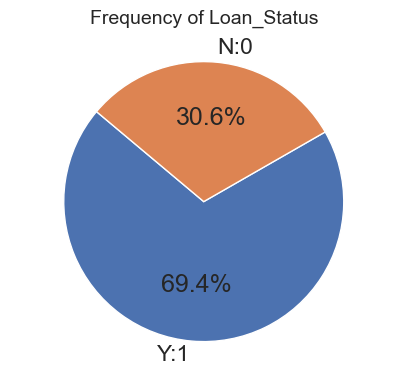

In [275]:
# Count the frequencies of target
target_counts = y.value_counts()

# Create a pie plot
plt.figure(figsize=(5, 4))
plt.pie(target_counts, labels=['Y:1', 'N:0'], autopct='%1.1f%%', startangle=140)

plt.title("Frequency of Loan_Status", size=14, y=1.05)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [277]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1, y1 = SM.fit_resample(x, y)

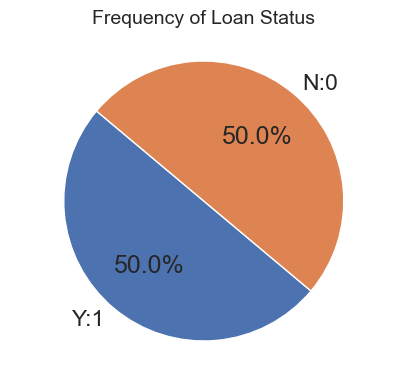

In [278]:
# Count the frequencies of target
target_counts = y1.value_counts()

# Create a pie plot
plt.figure(figsize=(5, 4))
plt.pie(target_counts, labels=['Y:1', 'N:0'], autopct='%1.1f%%', startangle=140)

plt.title("Frequency of Loan Status", size=14, y=1.05)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [279]:
x= x1
y = y1

Since the data is balanced, we can build machine learning classification models.

# 3. Modeling

## 3.1 Finding the best random state

In [280]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    RFC=RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred=RFC.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc> maxAccu:
        maxAccu=acc
        maxRS=i
        
print("Best Accuracy is ",maxAccu,"at random state",maxRS)

Best Accuracy is  0.8646288209606987 at random state 29


# 3.2 Creating train test split

In [281]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=maxRS)
print("x_train shape: ", x_train.shape)
print("x_test shape:  ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape:  ", y_test.shape)

x_train shape:  (533, 13)
x_test shape:   (229, 13)
y_train shape:  (533,)
y_test shape:   (229,)


# 3.3 Classification Algorithms

In [282]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

### Creating a Function with accuracy score,confusion matrix,classification report and difference between accuracy score and cross validation

In [283]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print("\n================Train Result=============")
        
        print(f"Accuracy Score:{accuracy_score(y_train,y_pred)*100:.2f}%")  #accuracy score for train result
              
    
    elif train==False:
        pred=clf.predict(x_test)
              
        print("\n================Test Result=============")
        
        print(f" \n Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%")  #accuracy score for test result
        
        print(f"  \n \n Confusion matrix: \n {confusion_matrix(y_test,pred)}") #confusion matrix for test result
              
        print("\n \n Test Classification Report \n",classification_report(y_test,pred,digits=2)) #classification result for test result
        
        
        score=cross_val_score(clf,x,y)
        print('\n', score)
        print('\n' ,score.mean())
        print(" \n \n Difference between accuracy score and cross validation is:",accuracy_score(y_test,pred)-score.mean()) #Difference between accuracy score and cross validation(to find which model is best)

# 3.3.1 LogisticRegression

In [284]:
clf=LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

In [285]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
Accuracy Score:73.36%

================Test Result=============
 
 Accuracy Score:70.31%
  
 
 Confusion matrix: 
 [[76 42]
 [26 85]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.75      0.64      0.69       118
           1       0.67      0.77      0.71       111

    accuracy                           0.70       229
   macro avg       0.71      0.70      0.70       229
weighted avg       0.71      0.70      0.70       229


 [0.69934641 0.71895425 0.67105263 0.69736842 0.68421053]

 0.6941864465084279
 
 
 Difference between accuracy score and cross validation is: 0.008870322050524071


# 3.3.2 RandomForestClassifier

In [286]:
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

In [287]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
Accuracy Score:100.00%

================Test Result=============
 
 Accuracy Score:84.28%
  
 
 Confusion matrix: 
 [[ 93  25]
 [ 11 100]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.79      0.84       118
           1       0.80      0.90      0.85       111

    accuracy                           0.84       229
   macro avg       0.85      0.84      0.84       229
weighted avg       0.85      0.84      0.84       229


 [0.77777778 0.79738562 0.83552632 0.84868421 0.86842105]

 0.8255589955280358
 
 
 Difference between accuracy score and cross validation is: 0.017235764297291678


# 3.3.3 SVC(Support Vector Machine Classifier)

In [288]:
clf=SVC()
clf.fit(x_train,y_train)

SVC()

In [289]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
Accuracy Score:80.30%

================Test Result=============
 
 Accuracy Score:74.24%
  
 
 Confusion matrix: 
 [[78 40]
 [19 92]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.80      0.66      0.73       118
           1       0.70      0.83      0.76       111

    accuracy                           0.74       229
   macro avg       0.75      0.74      0.74       229
weighted avg       0.75      0.74      0.74       229


 [0.74509804 0.77777778 0.73684211 0.74342105 0.71052632]

 0.7427330581355349
 
 
 Difference between accuracy score and cross validation is: -0.0003749795329148764


# 3.3.4 GradientBoostingClassifier

In [290]:
clf=GradientBoostingClassifier()
clf.fit(x_train,y_train)

GradientBoostingClassifier()

In [291]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
Accuracy Score:90.81%

================Test Result=============
 
 Accuracy Score:79.48%
  
 
 Confusion matrix: 
 [[83 35]
 [12 99]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.70      0.78       118
           1       0.74      0.89      0.81       111

    accuracy                           0.79       229
   macro avg       0.81      0.80      0.79       229
weighted avg       0.81      0.79      0.79       229


 [0.7124183  0.73856209 0.75657895 0.82894737 0.84210526]

 0.7757223942208463
 
 
 Difference between accuracy score and cross validation is: 0.01903743110666456


# 3.3.5 AdaBoostClassifier

In [292]:
clf=AdaBoostClassifier()
clf.fit(x_train,y_train)

AdaBoostClassifier()

In [293]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
Accuracy Score:82.93%

================Test Result=============
 
 Accuracy Score:74.67%
  
 
 Confusion matrix: 
 [[79 39]
 [19 92]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.81      0.67      0.73       118
           1       0.70      0.83      0.76       111

    accuracy                           0.75       229
   macro avg       0.75      0.75      0.75       229
weighted avg       0.76      0.75      0.75       229


 [0.69934641 0.73202614 0.74342105 0.77631579 0.79605263]

 0.7494324045407637
 
 
 Difference between accuracy score and cross validation is: -0.0027075137110693648


# 3.3.6 BaggingClassifier

In [294]:
clf=BaggingClassifier()
clf.fit(x_train,y_train)

BaggingClassifier()

In [295]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
Accuracy Score:99.25%

================Test Result=============
 
 Accuracy Score:83.84%
  
 
 Confusion matrix: 
 [[105  13]
 [ 24  87]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       118
           1       0.87      0.78      0.82       111

    accuracy                           0.84       229
   macro avg       0.84      0.84      0.84       229
weighted avg       0.84      0.84      0.84       229


 [0.79738562 0.75816993 0.76973684 0.79605263 0.79605263]

 0.7834795321637427
 
 
 Difference between accuracy score and cross validation is: 0.05494841543451057


# 3.3.7 ExtraTreesClassifier

In [296]:
clf=ExtraTreesClassifier()
clf.fit(x_train,y_train)

ExtraTreesClassifier()

In [297]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
Accuracy Score:100.00%

================Test Result=============
 
 Accuracy Score:87.34%
  
 
 Confusion matrix: 
 [[ 98  20]
 [  9 102]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.83      0.87       118
           1       0.84      0.92      0.88       111

    accuracy                           0.87       229
   macro avg       0.88      0.87      0.87       229
weighted avg       0.88      0.87      0.87       229


 [0.80392157 0.82352941 0.81578947 0.86184211 0.86842105]

 0.8347007223942209
 
 
 Difference between accuracy score and cross validation is: 0.038661723020626315


# 3.3.8 DecisionTreeClassifier

In [298]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [299]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
Accuracy Score:100.00%

================Test Result=============
 
 Accuracy Score:69.87%
  
 
 Confusion matrix: 
 [[82 36]
 [33 78]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.71      0.69      0.70       118
           1       0.68      0.70      0.69       111

    accuracy                           0.70       229
   macro avg       0.70      0.70      0.70       229
weighted avg       0.70      0.70      0.70       229


 [0.75816993 0.71895425 0.73684211 0.74342105 0.77631579]

 0.7467406260749915
 
 
 Difference between accuracy score and cross validation is: -0.04805066974311378


**==>  The model with the best accuracy is ExtraTreesClassifier with 87.34% of accuracy**

**==>After applying cross-validation technique we observe the better cross-validation score is for ExtraTreesClassifier(0.8347) and the difference with accuracy score is 0.0386617**


**We conclude ExtraTreesClassifier is our best Model**

# 3.5 Hyper Parameter Tuning

### 3.5.1 Finding the best parameters for ExtraTreesClassifier

In [301]:
maxRS

29

In [302]:
model = ExtraTreesClassifier()
model.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [303]:
# ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap':[True, False],
             'criterion':['gini', 'entropy'],
             'random_state': [50, 155, 1000],
             'max_depth':[0, 10, 20],
             'n_jobs': [-2, -1, 1],
             'n_estimators': [50, 100, 200, 300]}

# Build the model 
model = ExtraTreesClassifier()

In [304]:
%%time 

# Perform search with cross validation
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

CPU times: total: 4.17 s
Wall time: 6min 40s


GridSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [50, 155, 1000]})

In [305]:
# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters for ExtraTreesClassifier model:")
best_params

Best Parameters for ExtraTreesClassifier model:


{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 20,
 'n_estimators': 100,
 'n_jobs': -2,
 'random_state': 155}

These are the best parameters for training the model.

In [306]:
best_model

ExtraTreesClassifier(bootstrap=True, max_depth=20, n_jobs=-2, random_state=155)

# 3.6 Final Model

In [307]:
# Create the model with the best parameters
best_model = ExtraTreesClassifier (criterion = 'gini', 
                                   max_depth = 20, 
                                   n_estimators = 100, 
                                   n_jobs = -2, 
                                   random_state = 155)

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

# Check the accuracy
acc = accuracy_score(y_test, y_pred)
print(f"accuracy_score: {round(acc*100,2)}%")

accuracy_score: 87.77%


### The accuracy for the final model is 87.77%

# 3.6.1 Saving the model

In [318]:
# Saving the model using .pkl
import joblib
joblib.dump(best_model, "models/Loan_Application_model.pkl")

['models/Loan_Application_model.pkl']

# 3.6.2 Predicting the saved model

In [319]:
# Lets load the saved model and get the predictions
model = joblib.load("models/Loan_Application_model.pkl")

# Prediction
prediction = model.predict(x_test)

# Accuracy score of the prediction with the model selected
print(f"Accuracy score: {accuracy_score(y_test, prediction)*100:.3f} %")

# Dataframe to compare the predicted values vs the original values
df_result = pd.DataFrame()
df_result['Predicted'] = prediction
df_result['Original'] = np.array(y_test)
df_result.T

Accuracy score: 87.773 %


,0,1,2,3,4,5,6,7,8,9,...,219,220,221,222,223,224,225,226,227,228
Predicted,0,1,1,1,0,1,0,1,0,0,...,0,1,0,1,1,1,1,1,1,0
Original,0,1,1,1,0,1,1,1,0,0,...,0,1,0,1,1,0,1,0,1,1


These are the predicted values in the fraction of the dataset we appart for testing to compare the prediction with accuracy of 87.77%.

# The best model was ExtraTreesClassifier with accuracy_score: 87.77%

**Note: While conducting data analysis, I explored various approaches from different sources. These references served as inspiration during the exploratory data analysis (EDA) process, but I refrained from directly copying the analysis or code**